# Importing Data and Packages

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df = pd.read_csv("dataset.csv")

# Examining basic information

In [5]:
df.shape

(19, 5)

In [12]:
df

,User ID,Gender,Age,Estimated Salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [7]:
df.value_counts()

User ID   Gender  Age  Estimated Salary  Purchased
15570769  Female  26   80000             0            1
15697686  Male    29   80000             0            1
15804002  Male    19   76000             0            1
15746139  Male    20   86000             0            1
15733883  Male    47   25000             1            1
15728773  Male    27   58000             0            1
15727311  Female  35   65000             0            1
15704987  Male    32   18000             0            1
15704583  Male    46   28000             1            1
15694829  Female  32   150000            1            1
15598044  Female  27   84000             0            1
15668575  Female  26   43000             0            1
15628972  Male    18   82000             0            1
15624510  Male    19   19000             0            1
15617482  Male    45   26000             1            1
15606274  Female  26   52000             0            1
15603246  Female  27   57000             0           

# Preprocessing

In [18]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)

In [19]:
df.head()

,User ID,Gender,Age,Estimated Salary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [22]:
df = df.iloc[:, [1,2,3,4]]

In [23]:
df

,Gender,Age,Estimated Salary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
5,1,27,58000,0
6,0,27,84000,0
7,0,32,150000,1
8,1,25,33000,0
9,0,35,65000,0


# Getting training and test sets

In [27]:
x = df.iloc[:, [0,1,2]]
y = df.iloc[:, [3]]

In [28]:
x.head()

,Gender,Age,Estimated Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [30]:
y.value_counts()

Purchased
0            15
1             4
dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# scaling the features to normalize the values
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train[['Age', 'Estimated Salary']] = scaler.fit_transform(X_train[['Age', 'Estimated Salary']])

# Transform the test data using the same scaler
X_test[['Age', 'Estimated Salary']] = scaler.transform(X_test[['Age', 'Estimated Salary']])

<ipython-input-39-1e28023cc6d5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['Age', 'Estimated Salary']] = scaler.fit_transform(X_train[['Age', 'Estimated Salary']])
E:\Coding\Anaconda\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-39-1e28023cc6d5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

# Model, Training and Metrics

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

E:\Coding\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [43]:
accuracy_score(y_test, y_pred)

0.8333333333333334

# Plotting decision boundary

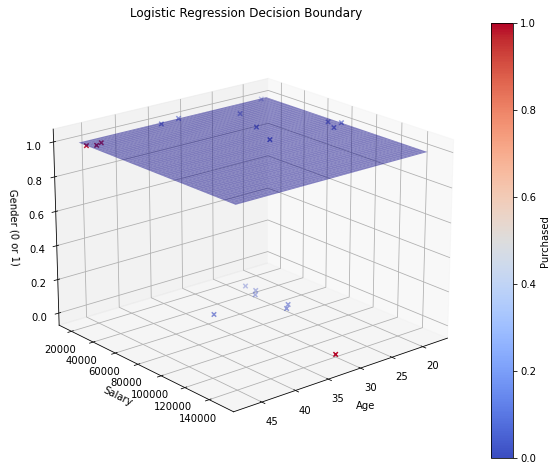

In [62]:
X_array = x.to_numpy()

age_range = np.linspace(min(X_array[:, 1]), max(X_array[:, 1]), 50)
salary_range = np.linspace(min(X_array[:, 2]), max(X_array[:, 2]), 50)

age_mesh, salary_mesh = np.meshgrid(age_range, salary_range)
gender_mesh = np.ones(age_mesh.shape)
mesh_data = np.c_[gender_mesh.ravel(), age_mesh.ravel(),
salary_mesh.ravel()]
predictions = classifier.predict(mesh_data)
predictions = predictions.reshape(age_mesh.shape)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_array[:, 1], X_array[:, 2], X_array[:, 0], c=y, cmap='coolwarm',
marker='x', label='Data Points')

# Comment out the following line to remove the decision boundary
boundary = ax.plot_surface(age_mesh, salary_mesh, predictions, cmap='plasma', alpha=0.5)

ax.set_xlabel('Age')
ax.set_ylabel('Salary')
ax.set_zlabel('Gender (0 or 1)')
fig.colorbar(scatter, ax=ax, label='Purchased')
ax.view_init(elev=20, azim=50)
plt.title('Logistic Regression Decision Boundary')
plt.show()